# COMP2002 - Machine Learning and Optimisation Assignment
This template can be used for the weekly coding exercises, and for your coursework.

In [1]:
# Import packages used in the Python Program
import pandas as pandas
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neural_network import MLPRegressor 
from sklearn.svm import SVR 
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Task 1.1 – Data preparation - Start
THE MAX ITERATIONS MAY NEED TO BE INCREASED IN THE Multilayer_Perceptron - I set mine to 6000

In [2]:
# Import datasets and Train with AlgerianFF Region 1 and Test with Algerian Region 2
AffRegion1Dataset = pandas.read_csv("AlgerianFF_Region1.csv")
AffRegion2Dataset = pandas.read_csv("AlgerianFF_Region2.csv")

In [3]:
# Display the contents of the Region 1 Dataset
AffRegion1Dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1


In [4]:
# Display the contents of the Region 2 Dataset
AffRegion2Dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5
118,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0
119,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
120,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [5]:
# Retrieve and seperate inputs/targets from datasets
inputs_DatasetRegion1 = AffRegion1Dataset[['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']]
targets_DatasetRegion1 = AffRegion1Dataset[['FWI']]

inputs_testRegion2 = AffRegion2Dataset[['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']]
targets_testRegion2Data = AffRegion2Dataset[['FWI']]

In [6]:
# Normalisze the data set inputs
scaler = MinMaxScaler()
trainingData = scaler.fit_transform(inputs_DatasetRegion1)
testingData = scaler.fit_transform(inputs_testRegion2)

# Task 1.1 – Data preparation - End

# Task 1.2 – Regression - Start

In [7]:
# Random Forest Regression Method
RandomF_Regressor = RandomForestRegressor()
RandomF_Regressor.fit(trainingData, targets_DatasetRegion1.values.ravel())
RandonF_outputs = RandomF_Regressor.predict(testingData)
print("Testing Predction Output : ", RandonF_outputs)

RandonForest_MAE = (mean_absolute_error(targets_testRegion2Data, RandonF_outputs))
print("MAE: ", RandonForest_MAE)

Testing Predction Output :  [ 0.13   0.1    0.019  0.678  0.552  1.119  3.639  0.433  0.721  6.693
 11.1    8.374  0.954  0.085  0.368  0.019  0.243  0.27   0.253  0.212
  2.429  0.624  0.47   2.92   4.147  6.411  8.378 12.595  3.865  1.52
  0.282  4.998  2.198  6.566 10.214  3.546  3.123  1.272  1.089  0.626
  0.473  6.87   3.017  6.793  9.255  3.568  3.763  5.321 10.576 11.264
 18.588 16.607 11.095  2.5    1.22   1.172  1.684  6.246  7.884 10.357
 11.411  0.596 10.568 11.749 13.575 14.047  0.882  0.405  3.464  7.779
  7.272 13.32  11.894  7.196 10.266  3.688 10.758 17.021 17.261  5.105
  5.594  6.571 12.758 16.016 17.413 17.571 18.547 15.453  4.722  4.131
 11.864 13.164  0.05   0.526  1.117  0.456  0.3    0.265  1.58   1.114
  1.722  0.235  0.691  1.963  7.182  2.919  6.614 12.403 11.752 10.871
  4.627  3.817 14.799 10.618 11.667  0.912  1.584  3.674  0.019  0.036
  0.602  0.366]
MAE:  2.9279999999999995


In [8]:
# Cross Validation Score for Random Forest
RandomF_CVS = cross_val_score(RandomF_Regressor, testingData, targets_testRegion2Data.values.ravel() , cv=3)

In [9]:
# Random MLP Regressor Method
MLP_Regressor = MLPRegressor()
MLP_Regressor.fit(trainingData, targets_DatasetRegion1.values.ravel()) #2000 iterations
MLP_Outputs = MLP_Regressor.predict(testingData)
print("Testing Predction Output : ", MLP_Outputs)

MLP_MAE = (mean_absolute_error(targets_testRegion2Data, MLP_Outputs))
print("MAE: ", MLP_MAE)

Testing Predction Output :  [ 2.26251872e-02 -1.21474154e-02  5.30539295e-03  2.14574584e-01
  1.95049087e-01  1.54121707e+00  3.91633584e+00  4.56012272e-01
  8.85841007e-01  7.06889492e+00  1.24918449e+01  8.73728287e+00
  1.00297429e+00  1.21314284e-01  9.97736527e-03 -1.05032727e-01
 -2.46848669e-02 -2.48566409e-01 -8.89542472e-02 -1.62816732e-01
  2.93940524e+00  3.82436975e-01  2.17009385e-01  3.28936502e+00
  4.32371440e+00  6.60141961e+00  8.47348793e+00  1.31955335e+01
  4.83827633e+00  1.26905134e+00  1.04721925e-01  4.52356769e+00
  3.29543082e+00  7.08050132e+00  1.11594360e+01  4.26083491e+00
  3.38376683e+00  1.92751534e+00  1.68705753e+00  7.66408306e-01
  4.02592427e-01  6.72286122e+00  2.74807730e+00  7.45943519e+00
  1.03615439e+01  4.79969571e+00  5.16409298e+00  6.42360208e+00
  9.35732634e+00  1.26070710e+01  2.19176078e+01  1.80064785e+01
  1.20057264e+01  3.01606234e+00  7.88422684e-01  7.13735256e-01
  1.45855581e+00  6.16280041e+00  7.62732803e+00  9.35364079e+

In [10]:
# Cross Validation Score for Neural Network
MLP_CVS = cross_val_score(MLP_Regressor, testingData, targets_testRegion2Data.values.ravel(), cv=3)

In [11]:
# Random Support Vector Machine Method
SVR_Regressor = SVR()
SVR_Regressor.fit(trainingData, targets_DatasetRegion1.values.ravel())
SVR_Outputs = SVR_Regressor.predict(testingData)
print("Testing Predction Output : ", SVR_Outputs)

SVR_MAE = (mean_absolute_error(targets_testRegion2Data, SVR_Outputs))
print("MAE: ", SVR_MAE)

Testing Predction Output :  [ 0.15963237  0.2598914   0.06508475  1.10100738  0.87978232  2.26388261
  3.91650291  0.69002319  1.35752875  5.55534297  8.616087    6.11876808
  0.66787465 -0.14308647  0.3341755  -0.07220238  0.17966437  2.11035672
  0.22147402 -0.20608429  3.16033659  1.45868619  0.86819886  3.40069402
  4.00932126  6.1518285   7.93028688 11.76678665  6.04545772  2.78716522
 -0.05607797  3.7302151   2.78396416  5.42181757  8.68395697  4.01007104
  3.61724815  2.02080097  1.71415624  0.52111053 -0.12802195  6.09146574
  3.12906786  6.69992188  8.57420675  3.40991893  4.00823668  5.62272004
  8.75806181 12.24783161 16.26545892 14.58372256 10.66396863  2.45967314
  1.28588549  1.24753707  1.74856502  5.60547797  7.09580547  9.17798052
 10.52515505  0.91999843  8.48515594 10.79431867 11.64157234 11.96018428
 -0.19288342 -0.54535555  3.31266682  7.94315107  7.05834212 13.16980214
 11.7166583   6.76330653 10.82207484  3.92238025 10.80819871 14.84134368
 16.46173874  7.7168053

In [12]:
# Cross Validation Score for Support Vector Machine
SVR_CVS = cross_val_score(SVR_Regressor, testingData, targets_testRegion2Data.values.ravel() , cv=3)

# Task 1.2 – Regression - End

# Task 1.3 - Assessment of Regression - Start

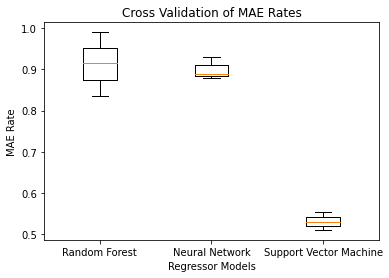

In [13]:
# Inert the Cross Validation Scores of all regressor models into Boxplot to display the MAE Rates
data = [RandomF_CVS, MLP_CVS, SVR_CVS]

# Creating plot
plt.boxplot(data)
  
# Adding title 
plt.title("Cross Validation of MAE Rates")

plt.xticks([1, 2, 3], ['Random Forest', 'Neural Network', 'Support Vector Machine'])
plt.xlabel('Regressor Models')
plt.ylabel('MAE Rate')

    
# show plot
plt.show()

# Task 1.3 - Assessment of Regression - End

# Part 2 Evolutionary Computation

In [14]:
# The fitness is the sum of the routes taken (Total distance)

# Import Necessary packages for code to function
import pandas as pandas
import numpy as np
import random


# Import the distances/city files to be used in the functions and to call the functions

# Change the datasets to short to view the name_short_corrected distances
citiesData = pandas.read_csv("cities.txt", header=None);
routedata = pandas.read_csv("distances.csv", header=None);

# Generation of random solutions -  Part 2.1 - Start

In [15]:
# Create a randomly generated solution of cities from the city dataset
def RandomSolutionCity(randomRoute):

    citiesData = list(range(len(randomRoute)))
    cityRoute = []

    for i in range(len(randomRoute)):

        randomCity = citiesData[random.randint(0, len(citiesData) - 1)]
        cityRoute.append(randomCity)
        citiesData.remove(randomCity)

    return cityRoute



# Get the total fitness distance of a salesmans route - fitness function
def CaculateDistance(tsp, solution):

    # Calculate the fitness and return it.
    CaculateDistance=0
    for i in range(1, len(solution)):

        CaculateDistance += tsp[solution[i - 1]][solution[i]]

    return CaculateDistance

In [16]:
# Test calculation with a random solution
CaculateDistance(routedata, RandomSolutionCity(citiesData))

5446.9

In [17]:
# Test calculation with a chosen solution - value should be 3857.3999999999996
CaculateDistance(routedata, [5, 3, 16, 11, 14, 2, 12, 13, 1, 10, 15, 17, 6, 4, 9, 0, 18, 19, 7, 8])

3857.3999999999996

# Generation of random solutions - Part 2.1 - End

# Algorithm implementation - Part 2.2 - Start

In [18]:
from matplotlib import pyplot as plt

# Global variables to store the averages of the mutations iterations
avgFitnessSwap = []
avgFitnessRR = []

In [19]:
# Ruin and Recreate randomly generates a new route every iteration
def ruinAndRecreateMutation(NumOfItterations, citySolution):

    # set the values to 0
    bestCityRoute = 0
    bestDistance = 0
    totalDistance = 0

    # create list arrays to store the iteration values
    maxFitnessRR = []
    minFitnessRR = []
    
    
    print("Beginning Ruin and Recreate Mutation...")
    

    # Loop through randomly generated route and print out the best route
    for i in range(NumOfItterations):

        # Call the fitness function with the randomly sorted cities from the city dataset
        randomCurrentRoute = RandomSolutionCity(citySolution)
        curDistance = CaculateDistance(routedata, RandomSolutionCity(citySolution))

        # If our current best distance is larger than the newly found distance, best distance is equal to that current distance
        if bestDistance == 0:
            bestCityRoute = randomCurrentRoute
            bestDistance = curDistance

        if bestDistance > curDistance:
            bestCityRoute = randomCurrentRoute.copy()
            bestDistance = curDistance

        # print out the current iteration, current fitness, and best fitness
        print("Current Iteration: ", i, " Current Route Distance: ", curDistance, " Best Distance Overall: ", bestDistance)

        # store the values from the current iteration into lists
        maxFitnessRR.append(curDistance)
        avgFitnessRR.append((curDistance + bestDistance) // 2)
        minFitnessRR.append(bestDistance)
        
        # end of for loop
        
    
        
        
    # Visualisation of results - Part 2.3 - Start
    
    # Set the plotting points for the line graphs
    plt.title("Ruin & Recreate")

    plt.plot(maxFitnessRR, label='Maximum Distance')
    plt.plot(avgFitnessRR, label='Average Distance')
    plt.plot(minFitnessRR, label='Minimum Distance')
    plt.legend()

    plt.xlabel('Number of Iterations')
    plt.ylabel('Distance')
    # Part 2.3 - End
    
    
        
    print("The Shortest Route Is: ", bestCityRoute, "The Total Distance Is: ", bestDistance)

    return bestCityRoute

In [20]:
# Swap function takes two cities and swaps them in the route
def swapMutation(NumOfItterations, randomCurrentRoute):

    # set the values to 0
    bestCityRoute = 0
    bestDistance = 0
    totalDistance = 0

    # create list arrays to store the iteration values
    maxFitnessSwap = []
    minFitnessSwap = []

    
    # Call the fitness function with the randomly sorted cities from the city dataset
    randomCurrentRoute = RandomSolutionCity(randomCurrentRoute)
    idx = range(len(randomCurrentRoute))
    
    

    print("Beginning Swap Mutation - Testing Current Route: ", randomCurrentRoute)
    
    

    # Loop through randomly generated route and print out the best route
    for i in range(NumOfItterations):

        # randomise two city values in the parent route
        i1, i2 = random.sample(idx, 2)
        randomCurrentRoute[i1], randomCurrentRoute[i2] = randomCurrentRoute[i2], randomCurrentRoute[i1]

        #Calculate the current distance
        curDistance = CaculateDistance(routedata ,randomCurrentRoute)

        # If our current best distance is larger than the newly found distance, best distance is equal to that current distance
        if bestDistance == 0:
            bestCityRoute = randomCurrentRoute
            bestDistance = curDistance

        if bestDistance > curDistance:
            bestCityRoute = randomCurrentRoute.copy()
            bestDistance = curDistance

        # print out the current iteration, current fitness, and best fitness
        print("Current Iteration: ", i, " Current Route Distance: ", curDistance, " Best Distance Overall: ", bestDistance)

        # Set the swap values back to their default locations
        randomCurrentRoute[i1], randomCurrentRoute[i2] = randomCurrentRoute[i2], randomCurrentRoute[i1]

        # store the values from the current iteration into lists
        maxFitnessSwap.append(curDistance)
        avgFitnessSwap.append((curDistance + bestDistance) // 2)
        minFitnessSwap.append(bestDistance)
        
        # end of for loop
        
        
        
    #  Visualisation of results - Part 2.3 - Start
    
    # Set the plotting points for the line graphs
    
    # Set the title of the graph
    plt.title("Swapping Cities in Route")
    
    # Set the plot points to the Max, Min, and Avg fitnesses
    plt.plot(maxFitnessSwap, label='Maximum Distance')
    plt.plot(avgFitnessSwap, label='Average Distance')
    plt.plot(minFitnessSwap, label='Minimum Distance')
    plt.legend()

    # Name the x and y axis
    plt.xlabel('Number of Iterations')
    plt.ylabel('Distance')
    # Part 2.3 - End
    
    

    print("The Shortest Route Is: ", bestCityRoute, "The Total Distance Is: ", bestDistance)
    
    return bestCityRoute

In [21]:
#find the best route and distance
def getBestNeighbour(tsp, bestCityRoute):
    bestRouteLength = CaculateDistance(tsp, bestCityRoute)
    bestNeighbour = bestCityRoute
    for neighbour in bestCityRoute:
        currentRouteLength = CaculateDistance(tsp, bestCityRoute)
        if currentRouteLength < bestRouteLength:
            bestRouteLength = currentRouteLength
            bestNeighbour = bestCityRoute
    return bestNeighbour, bestRouteLength

In [22]:
#optimise the route taken from the mutations to find the lowest distance 
def hillclimber(mutation, cityDataset, tsp, itterations):
    
    # create a random solution to compare to our mutation function
    currentSolution = RandomSolutionCity(cityDataset)
    currentRouteDistance = CaculateDistance(tsp ,currentSolution)
    neighbours = mutation

    # get best value from mutation and optimise it in the while loop
    bestNeighbour, bestNeighbourRouteLength = getBestNeighbour(tsp, neighbours)

    # Get best mutation/neighbour distance and compare to current route
    while bestNeighbourRouteLength < currentRouteDistance:
        currentSolution = bestNeighbour
        currentRouteDistance = bestNeighbourRouteLength
        neighbours = mutation
        bestNeighbour, bestNeighbourRouteLength = getBestNeighbour(tsp, neighbours)

    # return the best solution and fitness
    return currentSolution, currentRouteDistance

# Algorithm implementation - Part 2.2 - End

# Visualisation of results - Part 2.3 - Start
Also begins inside both mutation functions

Beginning Swap Mutation - Testing Current Route:  [7, 1, 13, 6, 18, 8, 11, 12, 15, 17, 19, 2, 0, 4, 9, 16, 3, 14, 5, 10]
Current Iteration:  0  Current Route Distance:  5201.6  Best Distance Overall:  5201.6
Current Iteration:  1  Current Route Distance:  5373.6  Best Distance Overall:  5201.6
Current Iteration:  2  Current Route Distance:  4718.6  Best Distance Overall:  4718.6
Current Iteration:  3  Current Route Distance:  5192.6  Best Distance Overall:  4718.6
Current Iteration:  4  Current Route Distance:  4829.1  Best Distance Overall:  4718.6
Current Iteration:  5  Current Route Distance:  5388.0  Best Distance Overall:  4718.6
Current Iteration:  6  Current Route Distance:  5375.6  Best Distance Overall:  4718.6
Current Iteration:  7  Current Route Distance:  5187.6  Best Distance Overall:  4718.6
Current Iteration:  8  Current Route Distance:  4757.6  Best Distance Overall:  4718.6
Current Iteration:  9  Current Route Distance:  5093.6  Best Distance Overall:  4718.6
Current I

([7, 1, 13, 6, 18, 8, 11, 12, 15, 17, 19, 2, 5, 4, 9, 16, 3, 14, 0, 10],
 4600.6)

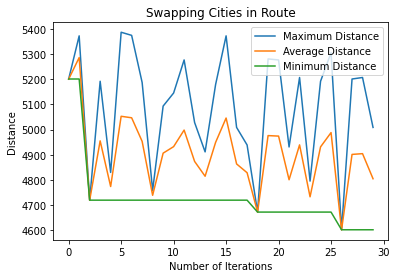

In [23]:
# Bug - Provides correct total distance, but return value for best distance changes (doesn't effect outcome - visual bug - only happens sometimes)
hillclimber(swapMutation(30, citiesData), citiesData, routedata, 30)

Beginning Ruin and Recreate Mutation...
Current Iteration:  0  Current Route Distance:  4791.7  Best Distance Overall:  4791.7
Current Iteration:  1  Current Route Distance:  3864.3  Best Distance Overall:  3864.3
Current Iteration:  2  Current Route Distance:  5119.6  Best Distance Overall:  3864.3
Current Iteration:  3  Current Route Distance:  4461.0  Best Distance Overall:  3864.3
Current Iteration:  4  Current Route Distance:  4852.5  Best Distance Overall:  3864.3
Current Iteration:  5  Current Route Distance:  4856.5  Best Distance Overall:  3864.3
Current Iteration:  6  Current Route Distance:  4495.2  Best Distance Overall:  3864.3
Current Iteration:  7  Current Route Distance:  5296.8  Best Distance Overall:  3864.3
Current Iteration:  8  Current Route Distance:  4054.1  Best Distance Overall:  3864.3
Current Iteration:  9  Current Route Distance:  4836.4  Best Distance Overall:  3864.3
Current Iteration:  10  Current Route Distance:  5526.6  Best Distance Overall:  3864.3
Cu

([8, 1, 15, 16, 19, 9, 11, 17, 14, 6, 5, 3, 0, 4, 18, 12, 2, 13, 7, 10],
 3863.4)

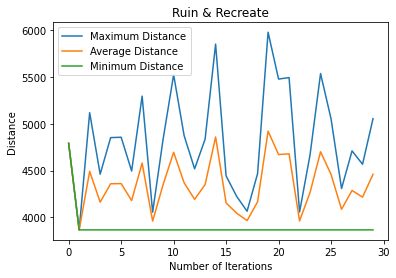

In [24]:
# Bug - Provides correct total distance, but return value for best distance changes (doesn't effect outcome - visual bug - only happens sometimes)
hillclimber(ruinAndRecreateMutation(30, citiesData), citiesData, routedata, 30)

Text(0, 0.5, 'Distance')

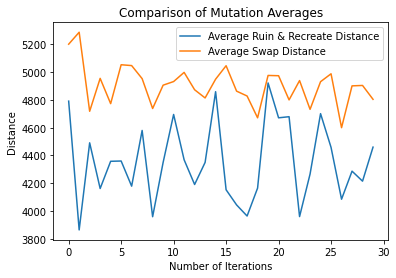

In [25]:
# Set the plotting points for the line graphs

# Set the title of the graph
plt.title("Comparison of Mutation Averages")

# set the plot points to the avg of the Ruin & Recreate/Swap Mutations
plt.plot(avgFitnessRR, label='Average Ruin & Recreate Distance')
plt.plot(avgFitnessSwap, label='Average Swap Distance')
plt.legend()

# Name the x and y axis
plt.xlabel('Number of Iterations')
plt.ylabel('Distance')

Above we can see the comparison between the two mutations (Ruin and Recreate & Swap). After running the Hillclimber Algorithm multiple times, I am noticing that the best mutation operator appears to be the Ruin and Recreate.
It reaches a much better fitness than the Swap Mutator, but the swap does have a more consistency due to it not being randomised, the radomisation allows us to have a higher chance a receiving a lower value as it is ever changing, while the swap will take the same route and only change two values from it. Meaning the value may change between only a few hundred, while the randomiser could alter between thousand or more.

# Visualisation of results - Part 2.3 - End